In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Clone YOLOv5 code
!git clone https://github.com/rkuo2000/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 3390, done.
remote: Total 3390 (delta 0), reused 0 (delta 0), pack-reused 3390
Receiving objects: 100% (3390/3390), 7.02 MiB | 25.69 MiB/s, done.
Resolving deltas: 100% (2276/2276), done.
/content/yolov5


In [ ]:
!unzip /content/drive/My\ Drive/dataset_cars.zip

Archive:  /content/drive/My Drive/dataset_cars.zip
   creating: dataset_cars/
   creating: dataset_cars/annotations/
  inflating: dataset_cars/annotations/Cars0.xml  
  inflating: dataset_cars/annotations/Cars1.xml  
  inflating: dataset_cars/annotations/Cars10.xml  
  inflating: dataset_cars/annotations/Cars100.xml  
  inflating: dataset_cars/annotations/Cars101.xml  
  inflating: dataset_cars/annotations/Cars102.xml  
  inflating: dataset_cars/annotations/Cars103.xml  
  inflating: dataset_cars/annotations/Cars104.xml  
  inflating: dataset_cars/annotations/Cars105.xml  
  inflating: dataset_cars/annotations/Cars106.xml  
  inflating: dataset_cars/annotations/Cars107.xml  
  inflating: dataset_cars/annotations/Cars108.xml  
  inflating: dataset_cars/annotations/Cars109.xml  
  inflating: dataset_cars/annotations/Cars11.xml  
  inflating: dataset_cars/annotations/Cars110.xml  
  inflating: dataset_cars/annotations/Cars111.xml  
  inflating: dataset_cars/annotations/Cars112.xml  
  inf

In [ ]:
!echo "train: Dataset/train/images" > data/alpr.yaml
!echo "val:   Dataset/train/images" >> data/alpr.yaml

!echo "nc : 1" >> data/alpr.yaml
!echo "names: ['license']" >> data/alpr.yaml

!cat data/alpr.yaml

train: Dataset/train/images
val:   Dataset/train/images
nc : 1
names: ['license']


## Prepare Dataset

In [ ]:
import os
import numpy as np
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile

In [ ]:
FILE_ROOT = "dataset_cars/"
IMAGE_PATH = FILE_ROOT + "images"  
ANNOTATIONS_PATH = FILE_ROOT + "annotations"

DATA_ROOT = "Dataset/"
DEST_IMAGES_PATH = "train/images"
DEST_LABELS_PATH = "train/labels"

In [ ]:
!mkdir -p Dataset/train/labels

In [ ]:
# copy images
!mkdir -p Dataset/train
!cp -rf dataset_cars/images Dataset/train

In [ ]:
!mkdir -p Dataset/val
!cp -rf dataset_cars/images/Cars1*.png Dataset/val

### Convert COCO Annotations to YOLOv5 Labels

In [ ]:
def convert_labels(label_size, input_variables):
    a1 = int(input_variables[0])
    b1 = int(input_variables[1])
    a2 = int(input_variables[2])
    b2 = int(input_variables[3])

    dw = np.float32(1. / int(label_size[0]))
    dh = np.float32(1. / int(label_size[1]))

    width = a2 - a1
    hight = b2 - b1
    x = a1 + (width / 2)
    y = b1 + (hight / 2)

    x = x * dw
    width = width * dw
    y = y * dh
    hight = hight * dh
    return [x, y, width, hight]
    
def saving_file(my_file, size):
    classes = ['license']
    temp = DATA_ROOT + DEST_LABELS_PATH + '/' + my_file + '.txt'
    path = open(temp, "a+")
    for box in img_box:                  
        label = convert_labels(size, box[1:])
        cls_num = 0
        path.write(f"{cls_num} {label[0]} {label[1]} {label[2]} {label[3]}\n")
    path.flush()
    path.close()
    
def get_xml(path, image_xml):
    image_path = path + '/' + image_xml + '.xml'

    dom = parse(image_path)
    temp = dom.documentElement
    img_name = temp.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = temp.getElementsByTagName("size")[0]
    items = temp.getElementsByTagName("object")
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
    image_variables = []
    for label in items:
        cls_name = label.getElementsByTagName("name")[0].childNodes[0].data
        a1 = int(label.getElementsByTagName("xmin")[0].childNodes[0].data)
        b1 = int(label.getElementsByTagName("ymin")[0].childNodes[0].data)
        a2 = int(label.getElementsByTagName("xmax")[0].childNodes[0].data)
        b2 = int(label.getElementsByTagName("ymax")[0].childNodes[0].data)
        image_variables.append([cls_name, a1, b1, a2, b2])
    saving_file(image_xml, [img_w, img_h], image_box)

In [ ]:
files = os.listdir(ANNOTATIONS_PATH)
for f in files:
    file_xml = f.split(".")
    get_data(ANNOTATIONS_PATH, file_xml[0])

file name:  Cars200.xml
dataset_cars/annotations/Cars200.xml
box:(c,xmin,ymin,xmax,ymax) licence 95 189 195 217
Dataset/train/labels/Cars200.txt
file name:  Cars212.xml
dataset_cars/annotations/Cars212.xml
box:(c,xmin,ymin,xmax,ymax) licence 105 94 290 141
Dataset/train/labels/Cars212.txt
file name:  Cars318.xml
dataset_cars/annotations/Cars318.xml
box:(c,xmin,ymin,xmax,ymax) licence 119 117 263 160
Dataset/train/labels/Cars318.txt
file name:  Cars104.xml
dataset_cars/annotations/Cars104.xml
box:(c,xmin,ymin,xmax,ymax) licence 195 266 244 282
Dataset/train/labels/Cars104.txt
file name:  Cars319.xml
dataset_cars/annotations/Cars319.xml
box:(c,xmin,ymin,xmax,ymax) licence 167 228 232 259
Dataset/train/labels/Cars319.txt
file name:  Cars360.xml
dataset_cars/annotations/Cars360.xml
box:(c,xmin,ymin,xmax,ymax) licence 52 167 94 200
Dataset/train/labels/Cars360.txt
file name:  Cars14.xml
dataset_cars/annotations/Cars14.xml
box:(c,xmin,ymin,xmax,ymax) licence 94 118 274 163
Dataset/train/labe

In [ ]:
!mkdir -p Dataset/val/labels
!cp -rf Dataset/train/labels/Cars1*.txt Dataset/val/labels

In [ ]:
!ls Dataset/train/labels

Cars0.txt    Cars166.txt  Cars231.txt  Cars298.txt  Cars363.txt  Cars429.txt
Cars100.txt  Cars167.txt  Cars232.txt  Cars299.txt  Cars364.txt  Cars42.txt
Cars101.txt  Cars168.txt  Cars233.txt  Cars29.txt   Cars365.txt  Cars430.txt
Cars102.txt  Cars169.txt  Cars234.txt  Cars2.txt    Cars366.txt  Cars431.txt
Cars103.txt  Cars16.txt   Cars235.txt  Cars300.txt  Cars367.txt  Cars432.txt
Cars104.txt  Cars170.txt  Cars236.txt  Cars301.txt  Cars368.txt  Cars43.txt
Cars105.txt  Cars171.txt  Cars237.txt  Cars302.txt  Cars369.txt  Cars44.txt
Cars106.txt  Cars172.txt  Cars238.txt  Cars303.txt  Cars36.txt	 Cars45.txt
Cars107.txt  Cars173.txt  Cars239.txt  Cars304.txt  Cars370.txt  Cars46.txt
Cars108.txt  Cars174.txt  Cars23.txt   Cars305.txt  Cars371.txt  Cars47.txt
Cars109.txt  Cars175.txt  Cars240.txt  Cars306.txt  Cars372.txt  Cars48.txt
Cars10.txt   Cars176.txt  Cars241.txt  Cars307.txt  Cars373.txt  Cars49.txt
Cars110.txt  Cars177.txt  Cars242.txt  Cars308.txt  Cars374.txt  Cars4.txt
Cars111.tx

## YOLOv5 Training

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 10.9 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install torch==1.7.0 torchvision==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 577.3 MB 4.8 kB/s 
     |████████████████████████████████| 12.6 MB 77 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.0+cu92 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.7.0+cu92 which is incompatible.


In [ ]:
!python train.py --img 416 --batch 16 --epochs 10 --data data/alpr.yaml --cfg models/yolov5s.yaml

Using torch 1.7.0+cu92 CPU

Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='models/yolov5s.yaml', data='data/alpr.yaml', device='', epochs=10, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/exp', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees'

## YOLOv5 Detect

In [ ]:
# Download OpenALPR Benchmarks
%cd ..
!git clone https://github.com/openalpr/benchmarks

/content
Cloning into 'benchmarks'...
remote: Enumerating objects: 1752, done.
remote: Total 1752 (delta 0), reused 0 (delta 0), pack-reused 1752
Receiving objects: 100% (1752/1752), 187.98 MiB | 33.75 MiB/s, done.
Resolving deltas: 100% (34/34), done.
Checking out files: 100% (1707/1707), done.


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!python detect.py --source ../benchmarks/endtoend/us --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='../benchmarks/endtoend/us', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
Using torch 1.7.0+cu92 CPU

Fusing layers... 
Model Summary: 232 layers, 7246518 parameters, 0 gradients, 16.8 GFLOPS
image 1/222 /content/benchmarks/endtoend/us/0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.jpg: 384x640 1 licenses, Done. (0.348s)
image 2/222 /content/benchmarks/endtoend/us/12c6cb72-3ea3-49e7-b381-e0cdfc5e8960.jpg: 384x640 Done. (0.340s)
image 3/222 /content/benchmarks/endtoend/us/1e241dc8-8f18-4955-8988-03a0ab49f813.jpg: 384x640 1 licenses, Done. (0.301s)
image 4/222 /content/benchmarks/endtoend/us/21d8c31d-3deb-494b-9c63-c0223306fd82.jpg: 384x640 1 licenses, Done. (0.305s)
image 5/222 /content/benchmarks/endtoend/us/22e54a62-57a8-4a0a-88c1-4b9758f67651.jpg: 384x640 1 licen

In [ ]:
!python detect.py --source ../benchmarks/endtoend/eu --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='../benchmarks/endtoend/eu', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
Using torch 1.7.0+cu92 CPU

Fusing layers... 
Model Summary: 232 layers, 7246518 parameters, 0 gradients, 16.8 GFLOPS
image 1/108 /content/benchmarks/endtoend/eu/eu1.jpg: 480x640 1 licenses, Done. (0.426s)
image 2/108 /content/benchmarks/endtoend/eu/eu10.jpg: 544x640 1 licenses, Done. (0.445s)
image 3/108 /content/benchmarks/endtoend/eu/eu11.jpg: 416x640 1 licenses, Done. (0.343s)
image 4/108 /content/benchmarks/endtoend/eu/eu2.jpg: 480x640 Done. (0.380s)
image 5/108 /content/benchmarks/endtoend/eu/eu3.jpg: 480x640 1 licenses, Done. (0.368s)
image 6/108 /content/benchmarks/endtoend/eu/eu4.jpg: 416x640 Done. (0.334s)
image 7/108 /content/benchmarks/endtoend/eu/eu5.jpg: 416x640 1 lice

In [ ]:
!python detect.py --source ../benchmarks/endtoend/br --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='../benchmarks/endtoend/br', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
Using torch 1.7.0+cu92 CPU

Fusing layers... 
Model Summary: 232 layers, 7246518 parameters, 0 gradients, 16.8 GFLOPS
image 1/115 /content/benchmarks/endtoend/br/AYO9034.jpg: 384x640 1 licenses, Done. (0.324s)
image 2/115 /content/benchmarks/endtoend/br/AZJ6991.jpg: 640x640 1 licenses, Done. (0.554s)
image 3/115 /content/benchmarks/endtoend/br/FZB9581.jpg: 640x640 1 licenses, Done. (0.505s)
image 4/115 /content/benchmarks/endtoend/br/GWT2180.jpg: 384x640 1 licenses, Done. (0.305s)
image 5/115 /content/benchmarks/endtoend/br/HPM9362.jpg: 480x640 1 licenses, Done. (0.398s)
image 6/115 /content/benchmarks/endtoend/br/JGZ3298.jpg: 480x640 Done. (0.389s)
image 7/115 /content/benchmarks/e

### Display Detected Images

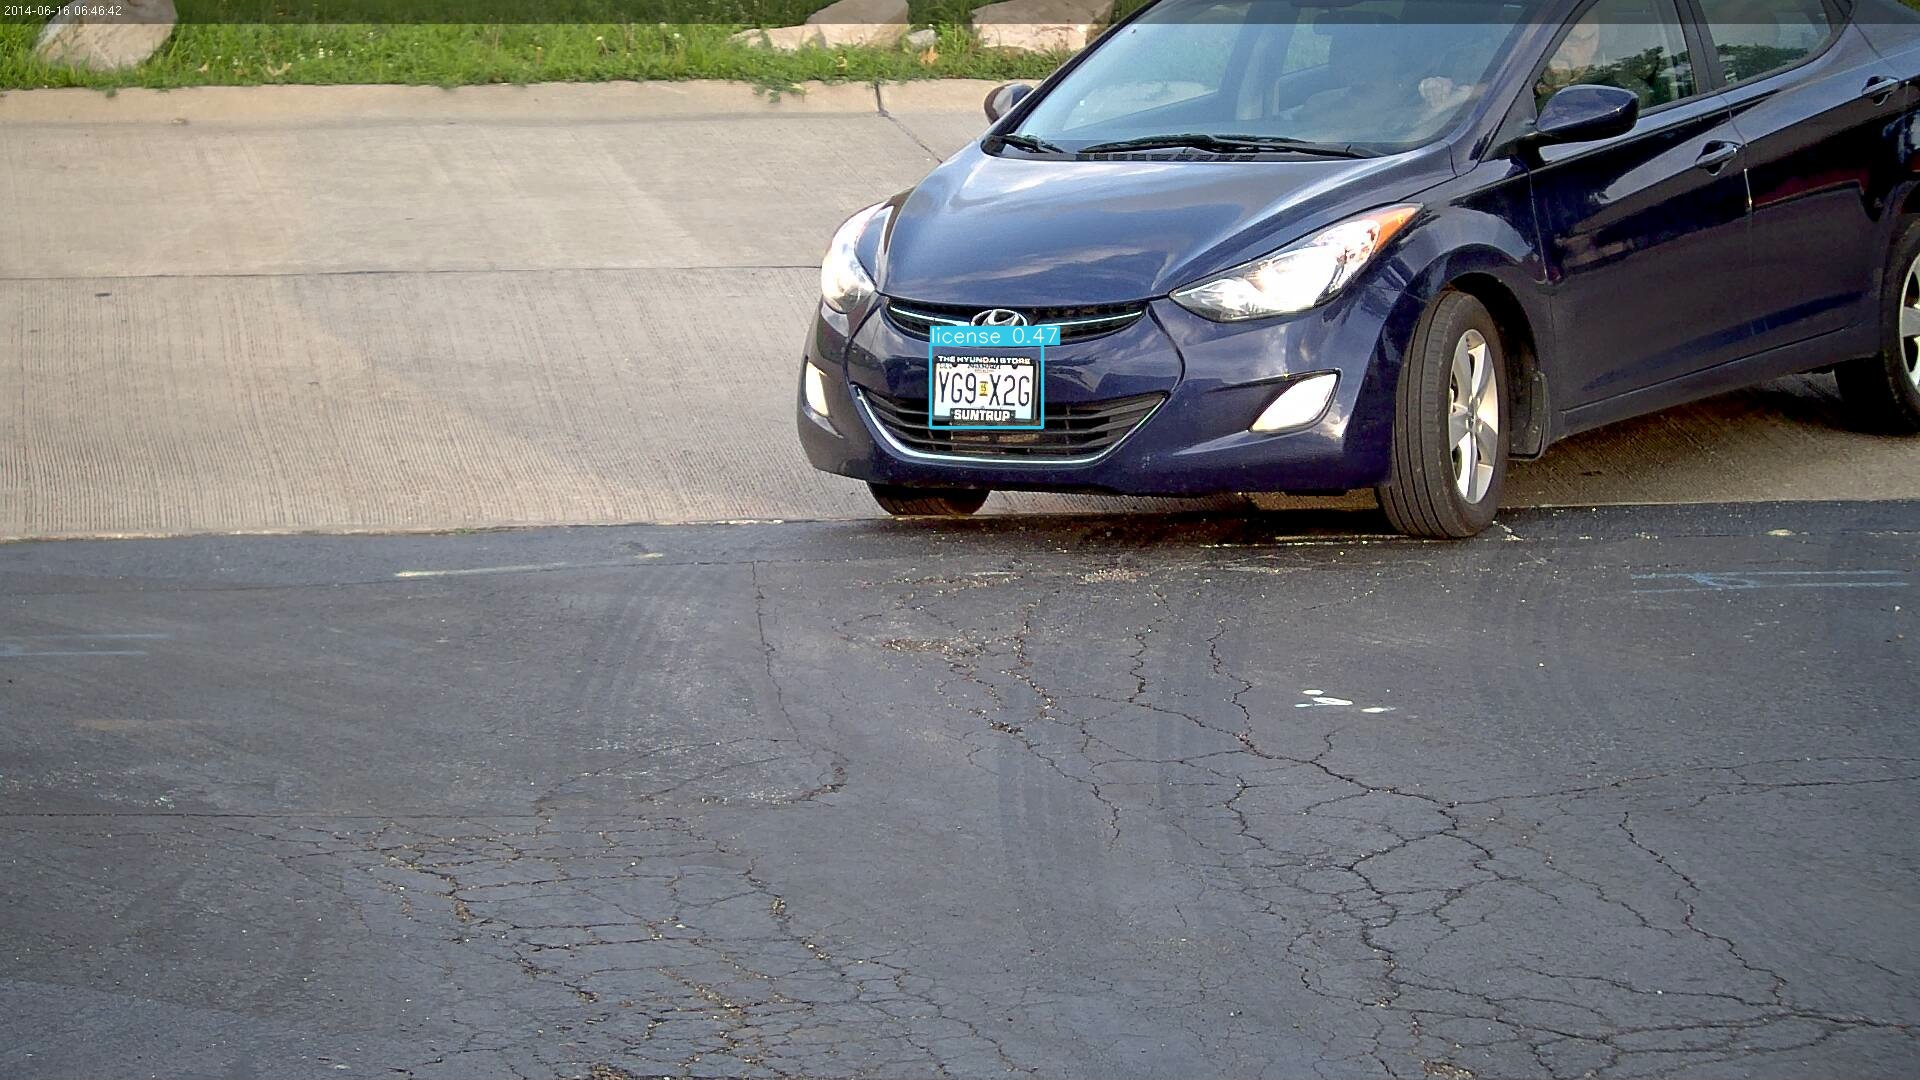

In [ ]:
Image('runs/detect/exp/0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.jpg')

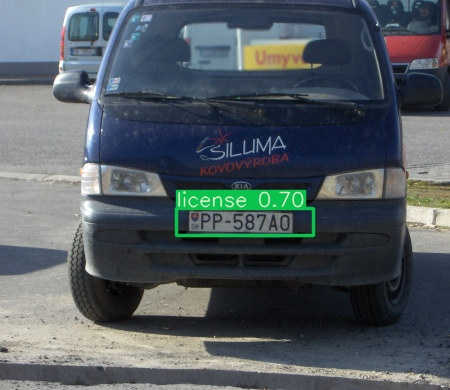

In [ ]:
Image('runs/detect/exp2/test_001.jpg')

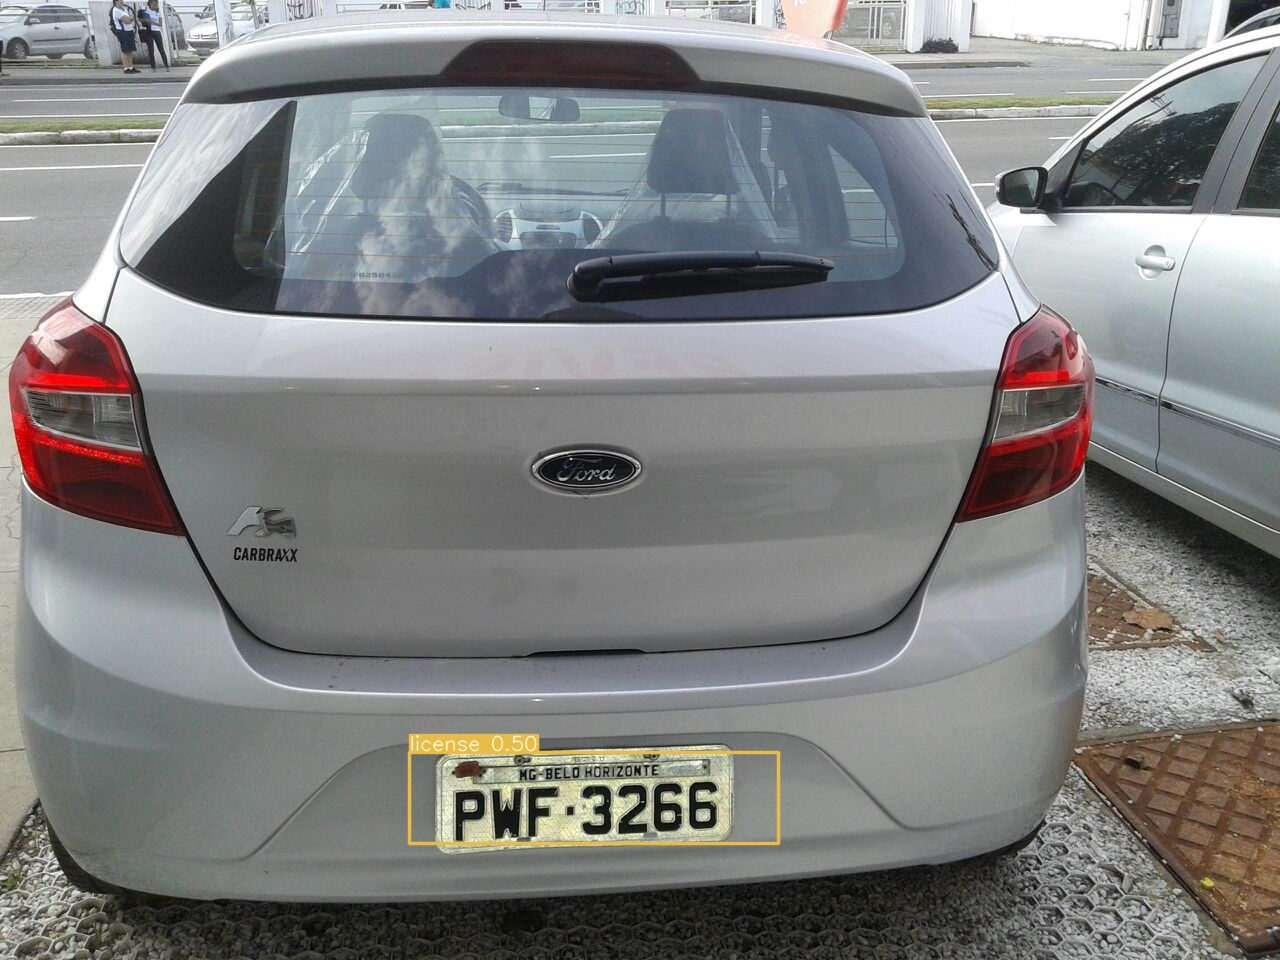

In [ ]:
Image('runs/detect/exp3/PWF3266.jpg')

## OCR 

### get detected ALPR bounding box

In [ ]:
# list saved .txt
!ls runs/detect/exp/labels

0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.txt  wts-lg-000037.txt  wts-lg-000123.txt
1e241dc8-8f18-4955-8988-03a0ab49f813.txt  wts-lg-000038.txt  wts-lg-000124.txt
21d8c31d-3deb-494b-9c63-c0223306fd82.txt  wts-lg-000039.txt  wts-lg-000125.txt
22e54a62-57a8-4a0a-88c1-4b9758f67651.txt  wts-lg-000040.txt  wts-lg-000126.txt
316b64c0-55bf-4079-a1c0-d93f461a576f.txt  wts-lg-000041.txt  wts-lg-000127.txt
33fa5185-0286-4e8f-b775-46162eba39d4.txt  wts-lg-000042.txt  wts-lg-000128.txt
37170dd1-2802-4e38-b982-c5d07c64ff67.txt  wts-lg-000043.txt  wts-lg-000129.txt
3850ba91-3c64-4c64-acba-0c46b61ec0da.txt  wts-lg-000044.txt  wts-lg-000130.txt
4be2025c-09f7-4bb0-b1bd-8e8633e6dec1.txt  wts-lg-000045.txt  wts-lg-000131.txt
5b562a61-34ad-4f00-9164-d34abb7a38e4.txt  wts-lg-000046.txt  wts-lg-000132.txt
7fbfbe28-aecb-45be-bd05-7cf26acb3c5c.txt  wts-lg-000047.txt  wts-lg-000133.txt
car11.txt				  wts-lg-000048.txt  wts-lg-000134.txt
car12.txt				  wts-lg-000049.txt  wts-lg-000135.txt
car13.txt				  wts-lg-00005

In [ ]:
# read .txt to get x,y,w,h of ALPR
def read_txt(filepath):
    f = open(filepath, 'r')
    lines = f.readlines()
         
    # read objects from each line of .txt
    objects = []
    for line in lines:
        line=line.rstrip()
        obj = [int(float(i)) for i in line.split(' ')]
        objects.append(obj)
    #print(objects)
    return objects

### OCR using PyTesseract

In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=db300fc8e620efe37ef17a92fa2ff0b7bea47d1ffb023bc06579309615d3f9e8
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [ ]:
!apt install tesseract-ocr
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,951 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../tesserac

In [ ]:
cascade= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")
states={"DL":"Delhi","GA":"Goa","GJ":"Gujarat","AN":"Andaman and Nicobar","AP":"Andhra Pradesh","AR":"Arunachal Pradesh","AS":"Assam",
        "BR":"Bihar","CH":"Chandigarh","DN":"Dadra and Nagar Haveli","DD":"Daman and Diu",
        "HR":"Haryana","HP":"Himachal Pradesh","JK":"Jammu and Kashmir","KA":"Karnataka","KL":"Kerala","LD":"Lakshadweep",
        "MP":"Madhya Pradesh","MH":"Maharashtra","PN":"Punjab","RJ":"Rajasthan","SK":"Sikkim","TN":"TamilNadu","TR":"Tripura","UP":"Uttar Pradesh", "WB":"West Bengal","CG":"Chhattisgarh","TS":"Telangana",
        "MN":"Manipur","ML":"Meghalaya","MZ":"Mizoram","NL":"Nagaland","OD":"Odissa","PY":"Pondicherry","JH":"Jharkhand","UK":"Uttarakhand"}

In [ ]:
import pandas as pd
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [ ]:
def extract_num(img_name):
    img = io.imread(img_name)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    nplate = cascade.detectMultiScale(gray,1.1,4)
    for (a,b,width,height) in nplate:
        a,b = (int(0.02*img.shape[0]), int(0.025*img.shape[1]))
        plate = img[b+a:b+height-a, a+b:a+width-b, :]
        kernel = np.ones((1, 1), np.uint8)
        licence_plate = cv2.dilate(licence_plate, kernel, iterations=1)
        licence_plate = cv2.erode(licence_plate, kernel, iterations=1)
        plate_gray = cv2.cvtColor(licence_plate,cv2.COLOR_BGR2GRAY)
        (thresh, licence_plate) = cv2.threshold(plate_gray, 127, 255, cv2.THRESH_BINARY)
        string_plate = pytesseract.image_to_string(licence_plate)
        string_plate = ''.join(e for e in string_plate if e.isalnum())
        print(string_plate)
        stat = string_plate[0:2]
        try:
            print('CAR DETAILS',states[stat])
            
        except:
            
            print('COULD NOT FIND STATE, MAY BE ITS FROM OUTSIDE INDIA')
            #UNDETECTED CARS
        print(string_plate)
        
        cv2.rectangle(img, (a,b), (a+width, b+height), (30,30,200), 2)
        
        cv2.rectangle(img, (a, b - 40), (a + width, b),(30,30,200) , -1)
        
        cv2.putText(img,string_plate, (a, b - 10), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 0.7, (200, 200, 200), 2)
        cv2_imshow(licence_plate)
        
        #SHOWING THE PLATE OF CAR
        cv2.imwrite('plate.jpg', licence_plate)

    cv2_imshow(img)
    
    #WRITING THE RESULTS
    cv2.imwrite('result.jpg',img)
    
    #CLOSING WINDOWS
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
DETECT_PATH = '/content/yolov5/runs/detect/exp/'
IMG_NAME    = 'car11'

In [ ]:
Image(DETECT_PATH+IMG_NAME+'.jpg')

DLSCAFSO30
Car Belongs to Delhi
DLSCAFSO30


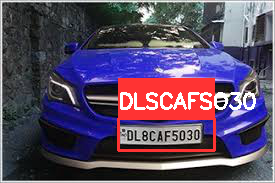

In [ ]:
#Let's make a function call
extract_num('car1.jpg')

In [ ]:
import csv
def search(rto):
  csv_file=csv.reader(open('/content/Indian RTO.csv','r'))
  for row in csv_file:
    if rto==row[1]:
      print('location', row[2])
      print('state', row[3])
  

DL7CN5617
location DY.DIR.ZONAL OFFICE,EAST DELHI,MAYUR VIHAR
state DL:Delhi
DL7CN5617


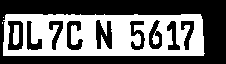

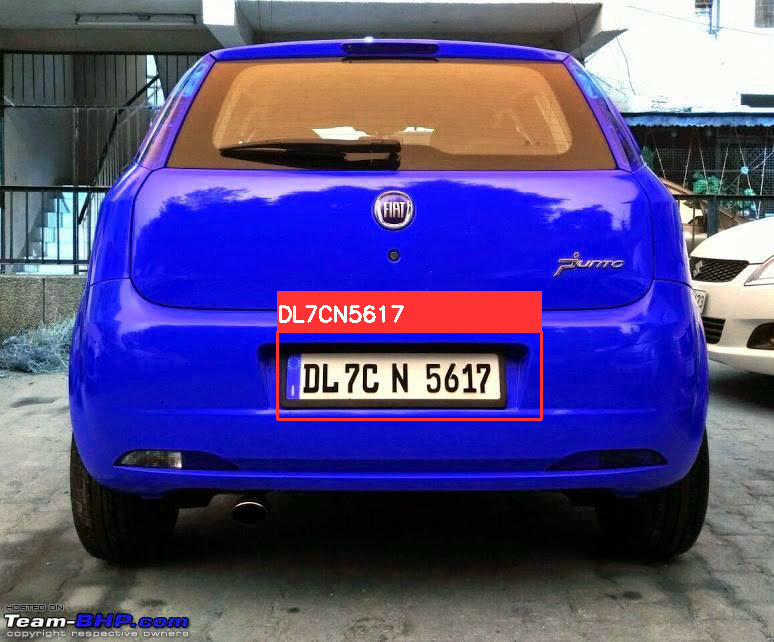

In [1]:
def extract_num(img_name):
    img = io.imread(img_name) ## Reading Image
    # Converting into Gray
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
#     gray = cv2.imread(img,0)
    # Detecting plate
    
    nplate = cascade.detectMultiScale(gray,1.1,4)
    for (x,y,w,h) in nplate:
        # Crop a portion of plate
        a,b = (int(0.02*img.shape[0]), int(0.025*img.shape[1]))
        plate = img[y+a:y+h-a, x+b:x+w-b, :]
        # make image more darker to identify the LPR
        ## iMAGE PROCESSING
        kernel = numpy.ones((1, 1), numpy.uint8)
        plate = cv2.dilate(plate, kernel, iterations=1)
        plate = cv2.erode(plate, kernel, iterations=1)
        plate_gray = cv2.cvtColor(plate,cv2.COLOR_BGR2GRAY)
        (thresh, plate) = cv2.threshold(plate_gray, 127, 255, cv2.THRESH_BINARY)

        # Feed Image to OCR engine
        read = pytesseract.image_to_string(plate)
        read = ''.join(e for e in read if e.isalnum())
        print(read)
        f=read[0:2]
        #last4=read[4:8]
       # print('first 4', fl4)
        #print('last 4',last4)
      
        try:
          if f=="DL":
            sz=read[0:3]
            search(sz)
          elif f=="AN":
            f=read[0:5]
            search(f)
          elif f=="TS":
            ff=read[0:5]
            search(ff)
          else:
            f4=read[0:4]
            search(f4)
        except:
            print('CAR  BELONGS OUTSIDE INDIA!!')
        print(read)
        cv2.rectangle(img, (x,y), (x+w, y+h), (49,49,200), 2)
        cv2.rectangle(img, (x, y - 40), (x + w, y),(49,49,20) , -1)
        cv2.putText(img,read, (x, y - 10), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 0.7, (200, 200, 200), 2)
        cv2_imshow(plate)
        # Save & display result image
        cv2.imwrite('plate.jpg', plate)

    cv2_imshow(img)
    cv2.imwrite('result.jpg',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Let's make a function call
extract_num('/content/car4.jpg')